In [1]:
import pandas as pd
import requests
import seaborn as sns 
from scipy import stats

In [2]:
def table_data(url_loc, sep=';'):
    # Формируем URL для запроса
    url = f'https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key={url_loc}'
    # Выполняем GET-запрос
    response = requests.get(url)
    if response.status_code == 200:
        # Преобразуем ответ в JSON
        res= response.json()['href']
        df_d = pd.read_csv(res, sep=sep)
        return df_d
    else:
        print(f'Ошибка: {response.status_code}')
        return None

In [3]:
# Ссылки на данныe 4 csv-файлов
groups_in       = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
groups_add_in   = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
active_studs_in = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
checks_in       = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'

In [4]:
groups = table_data(groups_in)
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [5]:
groups_add = table_data(groups_add_in, sep=',')
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [6]:
active_studs = table_data(active_studs_in)
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [7]:
checks = table_data(checks_in)
checks['pl'] = 1
checks.head()

,student_id,rev,pl
0,1627,990.0,1
1,3185,690.0,1
2,25973,690.0,1
3,26280,690.0,1
4,100300,990.0,1


In [8]:
# Анализируем данные
print('groups:') 
groups.info()
print('\ngroups_add:')
groups_add.info()
print('\nactive_studs:')
active_studs.info()
print('\nchecks:')
checks.info()

groups:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB

groups_add:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB

active_studs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB

checks:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 3 c

In [9]:
# Проверка на дубликаты
print(f'groups: {groups.duplicated().sum()}')
print(f'groups_add: {groups_add.duplicated().sum()}')
print(f'active_studs: {active_studs.duplicated().sum()}')
print(f'checks: {checks.duplicated().sum()}')

groups: 0
groups_add: 0
active_studs: 0
checks: 0


In [10]:
# Объединение groups и groups_add
groups_res = pd.concat([groups, groups_add], ignore_index=True)
groups_res

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74571,200247820,B
74572,201032527,B
74573,201067612,B
74574,201067653,B


In [11]:
# Проверка на дубликаты
groups_res.duplicated().sum()

0

In [12]:
# Проверка на уникальные значения
groups_res.nunique()

id     74576
grp        2
dtype: int64

In [13]:
groups_res.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

В контрольной группе наблюдается примерно в 4 раза меньше пользователей, чем в тестовой группе.

In [14]:
#  Объединение groups_res и checks (файл с информацией об оплатах пользователей в дни проведения эксперимента)
groups_checks = groups_res.merge(checks, left_on='id', right_on='student_id').drop('student_id', axis=1)
groups_checks

,id,grp,rev,pl
0,1627,A,990.0,1
1,3185,B,690.0,1
2,25973,B,690.0,1
3,26280,B,690.0,1
4,100300,B,990.0,1
...,...,...,...,...
536,5645737,B,1900.0,1
537,5651566,B,1900.0,1
538,5662322,B,1900.0,1
539,5681918,B,1900.0,1


In [15]:
groups_checks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      541 non-null    int64  
 1   grp     541 non-null    object 
 2   rev     541 non-null    float64
 3   pl      541 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.1+ KB


In [16]:
# Проверка на уникальные значения
groups_checks.nunique()

id     541
grp      2
rev     39
pl       1
dtype: int64

In [17]:
# Проверка на дубликаты
groups_checks.duplicated().sum()

0

In [18]:
groups_checks.grp.value_counts()

B    434
A    107
Name: grp, dtype: int64

Дубликаты отсутствуют. Представлена информация об оплате по 541 пользователю. В контрольной группе по прежнему наблюдается примерно в 4 раза меньше пользователей, чем в тестовой группе.

In [19]:
#  Проверим, сколько было активных пользователей, которые в дни эксперимента произвели и не произвели оплату
active_checks = pd.merge(active_studs, checks, how='left', on='student_id')
active_checks

,student_id,rev,pl
0,581585,NaN,NaN
1,5723133,NaN,NaN
2,3276743,NaN,NaN
3,4238589,NaN,NaN
4,4475369,NaN,NaN
...,...,...,...
8336,1794344,NaN,NaN
8337,296883,NaN,NaN
8338,3598448,NaN,NaN
8339,3610547,290.0,1.0


In [20]:
active_checks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  8341 non-null   int64  
 1   rev         392 non-null    float64
 2   pl          392 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 260.7 KB


In [21]:
active_checks.isnull().sum() 

student_id       0
rev           7949
pl            7949
dtype: int64

In [22]:
# Проверка на уникальные значения
active_checks.nunique()

student_id    8341
rev             38
pl               1
dtype: int64

7949 пользователей в дни эксперимента не произвели оплату. Наблюдается разногласие: в результирующем датафрейме с информацией о принадлежности пользователя к контрольной или тестовой группе представлены 541 пользователя, которые произвели оплату. А согласно датафрейму active_checks 392 пользователя были активны в дни эксперемента и прозвели оплату.

In [23]:
Вероятно произошел сбой. Следовательно будут учитываться только данные по тем пользователям, которые представлены в датафрейме active_checks

SyntaxError: invalid syntax (<ipython-input-23-0386951c0714>, line 1)

In [24]:
# Добавим столбец 'active', характеризующий принадлежность пользователей к активным (значение 1)
active_checks['active'] = 1
active_checks

,student_id,rev,pl,active
0,581585,NaN,NaN,1
1,5723133,NaN,NaN,1
2,3276743,NaN,NaN,1
3,4238589,NaN,NaN,1
4,4475369,NaN,NaN,1
...,...,...,...,...
8336,1794344,NaN,NaN,1
8337,296883,NaN,NaN,1
8338,3598448,NaN,NaN,1
8339,3610547,290.0,1.0,1


In [25]:
"""
Объединим данные о принадлежности пользователя к контрольной или тестовой группе (groups_res)
и данные об активности пользователей и оплате (active_checks)
"""
studs_res_checks = pd.merge(groups_res, active_checks, left_on='id', right_on='student_id', how='left').drop('student_id', axis=1)
studs_res_checks

,id,grp,rev,pl,active
0,1489,B,NaN,NaN,NaN
1,1627,A,990.0,1.0,1.0
2,1768,B,NaN,NaN,NaN
3,1783,B,NaN,NaN,NaN
4,1794,A,NaN,NaN,NaN
...,...,...,...,...,...
74571,200247820,B,NaN,NaN,NaN
74572,201032527,B,NaN,NaN,NaN
74573,201067612,B,NaN,NaN,NaN
74574,201067653,B,NaN,NaN,NaN


In [26]:
studs_res_checks.duplicated().sum()

0

In [27]:
studs_res_checks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74576 entries, 0 to 74575
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      74576 non-null  int64  
 1   grp     74576 non-null  object 
 2   rev     392 non-null    float64
 3   pl      392 non-null    float64
 4   active  8341 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.4+ MB


In [28]:
studs_res_checks.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

In [29]:
studs_res_checks.query('active > 0').grp.value_counts()

B    6803
A    1538
Name: grp, dtype: int64

In [30]:
studs_res_checks.query('active > 0 & rev > 0').grp.value_counts()

B    314
A     78
Name: grp, dtype: int64

14693 пользователя принадлежали к контрольной группе, из их 1538 - были активны в дни эксперимента.

59883 пользователя принадлежали к тестовой группе, из их 6803 - были активны в дни эксперимента.

Количество пользователей, которые были активны и совершали покупки составило 78 в контрольной и 314 тестовой группах.

Различие в группах существенное (примерно в 4 раза больше человек в тестовой группе), может привести к не совсем корректным результатам дальнейшего анализа и это стоит учитывать.


In [31]:
# Для дальнейшего исследования отберем активных пользователей в дни эксперимента
res = studs_res_checks.query('active > 0')
res.pl = res.pl.fillna(0)
res.rev = res.rev.fillna(0)
res

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,grp,rev,pl,active
1,1627,A,990.0,1.0,1.0
10,2085,B,0.0,0.0,1.0
12,2215,B,0.0,0.0,1.0
43,3391,A,0.0,0.0,1.0
45,3401,B,0.0,0.0,1.0
...,...,...,...,...,...
74543,5760471,B,0.0,0.0,1.0
74545,5777081,B,0.0,0.0,1.0
74558,5870856,A,0.0,0.0,1.0
74561,5945085,B,0.0,0.0,1.0


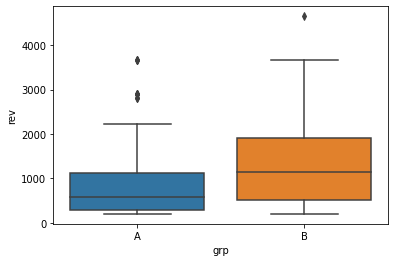

In [32]:
sns.boxplot(data=res.query('rev > 0'), x='grp', y='rev')

В тестовой группе медиана по оплате выше, но стоит учитывать существенное различие по количеству пользователей в группах.

# Метрики

Для анализа выбраны следующие метрики:
    
Conversion Rate (CR) - процент пользователей, которые выполнили целевое действие (например, покупка, регистрация).

Average Revenue Per User (ARPU) - средний доход, получаемый от каждого пользователя за определенный период.

Average Revenue Per Paying User (ARPPU) - средний доход, получаемый от каждого платящего пользователя за определенный период времени. 

In [33]:
# CR - отношение количества оплативших пользователей к количеству активных пользователей
# CR в контрольной группе
CR_grpA = len(res.query('rev > 0 & grp == "A"')) / len(res.query('grp == "A"')) * 100
CR_grpA    

5.071521456436931

In [34]:
# CR в тестовой группе
CR_grpB = len(res.query('rev > 0 & grp == "B"')) / len(res.query('grp == "B"')) * 100
CR_grpB

4.615610759958842

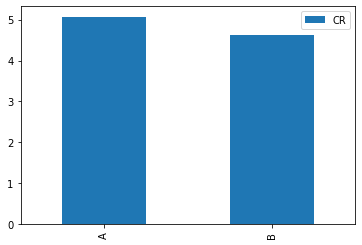

In [35]:
pd.DataFrame([CR_grpA, CR_grpB], index=['A', 'B'], columns=['CR']).plot.bar()

In [36]:
# ARPU - отношение выручки к количеству активных пользователей
# ARPU в контрольной группе
ARPU_grpA = (res.query('grp == "A"').rev.sum() / len(res.query('grp == "A"'))).round(2)
ARPU_grpA

47.35

In [37]:
# ARPU в тестовой группе
ARPU_grpB = (res.query('grp == "B"').rev.sum() / len(res.query('grp == "B"'))).round(2)
ARPU_grpB

58.06

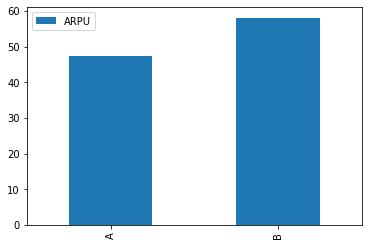

In [38]:
pd.DataFrame([ARPU_grpA, ARPU_grpB], index=['A', 'B'], columns=['ARPU']).plot.bar()

In [39]:
# ARPPU - отношение выручки к количеству оплативших пользователей
# ARPPU в контрольной группе
ARPPU_grpA = (res.query('grp == "A"').rev.sum() / len(res.query('rev > 0 & grp == "A"'))).round(2)
ARPPU_grpA

933.59

In [40]:
# ARPPU в тестовой группе
ARPPU_grpB = (res.query('grp == "B"').rev.sum() / len(res.query('rev > 0 & grp == "B"'))).round(2)
ARPPU_grpB

1257.88

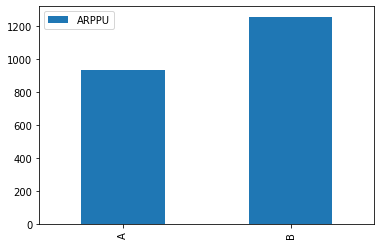

In [41]:
pd.DataFrame([ARPPU_grpA, ARPPU_grpB], index=['A', 'B'], columns=['ARPPU']).plot.bar()

Kонверсия в контрольной группе выше (А - 5.07%, В - 4.62%).

ARPU и ARPPU в тестовой группе выше, чем в контрольной группе (ARPU_grpA - 47.35 и ARPPU_grpA - 933.59,  ARPU_grpB - 58.06 и ARPPU_grpB - 1257.88)
        
Необходим дальнейший анализ для выявления статистически значимых различий.

# Статистика

Проверим есть ли статистически значимые различия между группами в конверсии.
Для этого применим критерий Хи-квадрат, так как данные категориальные, независимые наблюдения и  не менее 5 наблюдений в каждой ячейке таблицы сопряженности.

Н0 - новая механика оплаты услуг на сайте не влияет на CR.

Н1 - новая механика оплаты услуг на сайте влияет на CR.

In [42]:
# Таблица сопряженности
CR_t = pd.crosstab(res.grp, res.pl)
CR_t

pl,0.0,1.0
grp,,
A,1460,78
B,6489,314


In [43]:
stats.chi2_contingency(CR_t)

(0.48480826522557896,
 0.48625240457231045,
 1,
 array([[1465.71897854,   72.28102146],
        [6483.28102146,  319.71897854]]))

p-value = 0.48, что значительно превышает уровень значимости 0.05.
Нулевую гипотезу не отклоняем.
Следовательно, отсутствуют различия между А и B группами и новая механика оплаты услуг на сайте не влияет на CR.

Проверим есть ли статистически значимые различия между группами в ARPU и ARPPU.

H0 - отсутвуют различия в ARPU между исследуемыми группами.

H1 - присутсвуют различия в ARPU между исследуемыми группами.

=================================================================================

H0 - отсутвуют различия в ARPPU между исследуемыми группами.

H1 - присутсвуют различия в ARPPU между исследуемыми группами.


In [44]:
# Применим тест Левена для проверки гипотезы о равенстве дисперсий
print('Активные пользователи:', stats.levene(res.query('grp == "A"').rev, res.query('grp == "B"').rev))
print('Платящие пользователи:', stats.levene(res.query('grp == "A" & pl == 1').rev, res.query('grp == "B" & pl == 1').rev))

Активные пользователи: LeveneResult(statistic=1.501460829433639, pvalue=0.22048133327049665)
Платящие пользователи: LeveneResult(statistic=3.075681699981606, pvalue=0.08025675761347022)


Уровень значимости больше 0.05, нельзя отвергнуть нулевую гипотезу о равенстве дисперсий. 
Это означает, что дисперсии в группах А и В статистически не различаются.

In [45]:
# Проверка нормальности распределения
print('Группа А:', stats.normaltest(res.query('grp == "A"').rev))
print('Группа В:', stats.normaltest(res.query('grp == "B"').rev))
print('Группа А (платящие):', stats.normaltest(res.query('grp == "A" & pl == 1').rev))
print('Группа В (платящие):', stats.normaltest(res.query('grp == "B" & pl == 1').rev))

Группа А: NormaltestResult(statistic=2240.595797407402, pvalue=0.0)
Группа В: NormaltestResult(statistic=7797.399211581946, pvalue=0.0)
Группа А (платящие): NormaltestResult(statistic=30.378419638487475, pvalue=2.5316868804220266e-07)
Группа В (платящие): NormaltestResult(statistic=6.795662714490353, pvalue=0.033445723194625424)


Уровень значимость меньше 0.05, следовательно выборки распределены не нормально.

Для проверки статистически значимых различий между контрольной и тестовой группами в ARPU и ARPPU использую t-тест,
несмотря на отклонение от нормального распределения.
t-тест можно использовать поскольку выборки большие, выявлено равенство дисперсий в исследуемых группах.

In [46]:
print('Активные пользователи:', stats.ttest_ind(res.query('grp == "A"').rev, res.query('grp == "B"').rev, equal_var=True))
print('Платящие пользователи:', stats.ttest_ind(res.query('grp == "A" & pl == 1').rev, res.query('grp == "B" & pl == 1').rev, equal_var=True))

Активные пользователи: Ttest_indResult(statistic=-1.2253411073793445, pvalue=0.22048133326988378)
Платящие пользователи: Ttest_indResult(statistic=-3.1337795050930985, pvalue=0.0018562025265765867)


При введении новой механики оплаты услуг на сайте :

ARPU не поменяется (p-value больше 0.05, нулевую гипотезу нельзя опровергнуть),

ARPPU поменяется (p-value меньше 0.05, нулевую гипотезу можно опровергнуть).

Cтоит ли запускать новую механику на всех пользователей?

Не рекомедуется запускать новую механику оплаты услуг на сайте, так как показаны статистически значимые различия только в ARPPU и наблюдается снижение конверсии в тестовой группе. Также стоит обратить внимание на соотношение пользователей в контрольной и тестовой группах. Необходимо изучить, каким образом происходило деление пользователей на группы.

Как вариант, можно исследовать длительное влияние новой механики на пользователей, при условии, что будут включены корректные выборки.